In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout
import os

In [2]:
dirs=os.listdir('flower_images/')
for dir in dirs:
    files=list(os.listdir('flower_images/'+dir))
    print(dir+' has '+str(len(files))+' images')
    

Lilly has 1000 images
Lotus has 1000 images
Orchid has 1000 images
Sunflower has 1000 images
Tulip has 1000 images


In [3]:
direc='flower_images/'
class_names = ['Lilly ', 'Lotus', 'orchid', 'Sunflower', 'Tulip']
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory=direc,
    seed=123,
    validation_split=0.2,
    batch_size=32,
    image_size=(180,180),
    subset='training'
    
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    directory=direc,
    seed=123,
    validation_split=0.2,
    batch_size=32,
    image_size=(180,180),
    subset='validation'
    
)


Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [6]:
class_names = ['Lilly ', 'Lotus', 'orchid', 'Sunflower', 'Tulip']
class_names

['Lilly ', 'Lotus', 'orchid', 'Sunflower', 'Tulip']

In [7]:
autotune=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds=val_ds.cache().prefetch(buffer_size=autotune)

In [9]:
data_aug=Sequential([
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1,fill_mode="nearest"),
    
])

In [10]:
model=Sequential([
    data_aug,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='valid',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='valid',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='valid',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(5)
])

In [11]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [12]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,301,157 (12.59 MB)

 Trainable params: 3,301,157 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(train_ds,epochs=25,validation_data=val_ds)

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 180ms/step - accuracy: 0.3637 - loss: 1.5113 - val_accuracy: 0.5155 - val_loss: 1.2029
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.5536 - loss: 1.1088 - val_accuracy: 0.5866 - val_loss: 1.0540
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.6179 - loss: 0.9838 - val_accuracy: 0.6446 - val_loss: 0.9232
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.6389 - loss: 0.9210 - val_accuracy: 0.6617 - val_loss: 0.8901
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.6533 - loss: 0.8942 - val_accuracy: 0.6667 - val_loss: 0.8385
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.7056 - loss: 0.7833 - val_accuracy: 0.6927 - val_loss: 0.8008
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.7124 - loss: 0.7243 - val_accuracy: 0.7027 - val_loss: 0.7755
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.7343 - loss: 0

In [14]:
import sys
!{sys.executable} -m pip install opencv-python

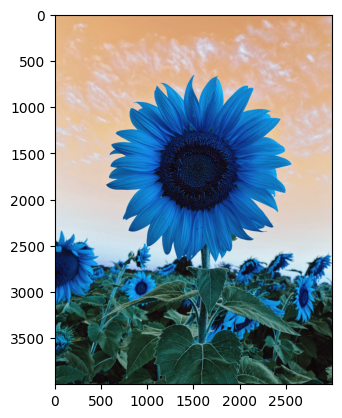

In [15]:
import cv2
import matplotlib.pyplot as plt
test_img=cv2.imread('photo-1597848212624-a19eb35e2651.jpeg')
plt.imshow(test_img)
# Define flower class names in the same order as your training labels



In [28]:
def call(input_image):
    input_image = tf.keras.utils.load_img(input_image, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome= 'This image belongs to '+ class_names[np.argmax(result)]+ ' with a score of '+ str(np.max(result)*100)+'%'
    return outcome
    

In [29]:
call('photo-1597848212624-a19eb35e2651.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'This image belongs to Sunflower with a score of 99.999985%'

In [31]:
model.save('flower_recognition_model.h5')